# THE CASE FOR IDENTIFYING CUSTOMER CHURN & PROMOTING CUSTOMER RETENTION 

<b> Retaining customers is a must for a company’s bottom line. A company’s customers are its greatest asset, impacting
business now, and becoming more valuable over time as they continue to invest in products and services. Customer
churn can be costly, or even devastating, to growing and established organizations alike. The true cost of churn is
often higher than business leaders generally estimate. Not only does it lead to lost revenue in the near term, but
it also means your team must double down on acquiring new customers to fill those revenue streams to ensure
continued success in the future. It is widely accepted that it can cost up to 5 times as much to acquire a new
customer as it does to retain a current customer.

Mosaic’s client, a leader in the propane industry, had seen a sharp rise in customer attrition. Recognizing the
implications to their business in having to win new customers at a steep cost, they wanted to prevent further
customer loss by learning why customers were terminating service. They turned to Mosaic, a trusted partner who
had helped them identify regions to successfully target new customers using unsupervised learning techniques.
Based on our prior work on this customer segmentation project, Mosaic was tasked with proving the value of
applying machine learning to combat customer churn.


# CHURN PREDICTION

<b>The customer churn, also known as customer attrition, refers to the phenomenon whereby a customer leaves a company. Some studies confirmed that acquiring new customers can cost five times more than satisfying and retaining existing customers. As a matter of fact, there are a lot of benefits that encourage the tracking of the customer churn rate, for example:
    1. Marketing costs to acquire new customers are high. Therefore, it is important to retain customers so that the initial investment is not wasted.
    2. It has a direct impact on the ability to expand the company
    
    

Marketing costs to acquire new customers are high. Therefore, it is important to retain customers so that the initial investment is not wasted;
It has a direct impact on the ability to expand the company;
etc.
In this project our goal is to predict the probability of a customer is likely to churn using machine learning techniques.

<b>Mosaic leveraged historical data used in a previous project and used real examples of customers deciding to leave
to learn the attributes and behavior that typically precede customer turnover. Mosaic’s data scientists interviewed
subject matter experts to incorporate their expertise in developing a working ML model.
    
Data-driven organizations like the propane firm typically use customer segmentation as a foundation for other
value-added analytics. Customer churn is a natural next step since it leverages the knowledge and data of the
customer segmentation project. Churn prediction enables targeted marketing and direct intervention for customers
most likely to leave, streamlining use of the marketing budget.

# AIM:

### In this project our goal is to predict the probability of a customer is likely to churn using machine learning techniques

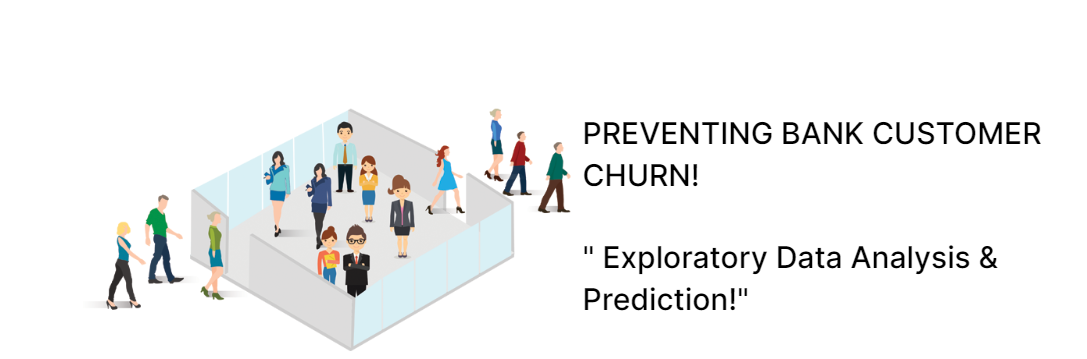

# Workflow of Project

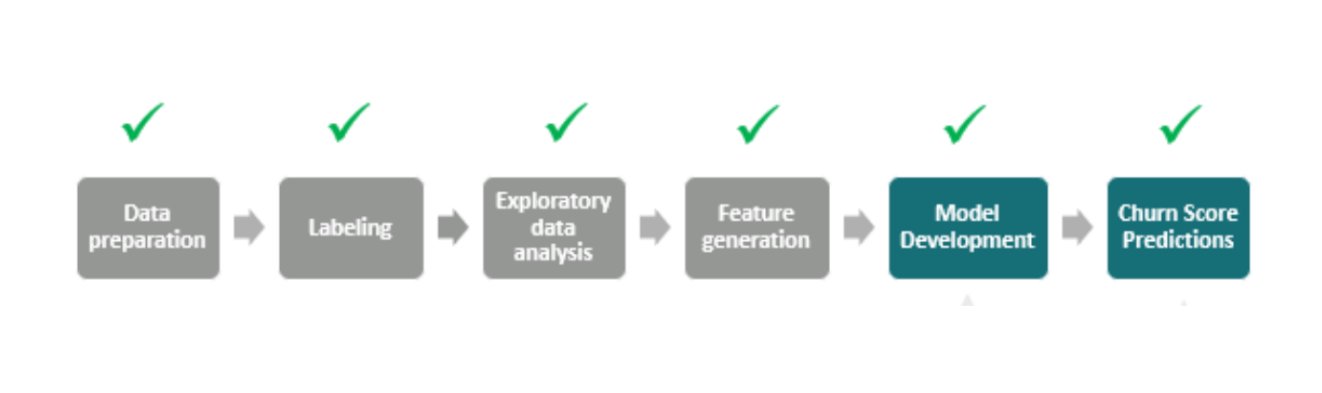

# 0. Import Libraries

In [1]:
## REQUIRED LIBRARIES

# For data wrangling and data manipulation
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

pd.options.display.max_rows = None
pd.options.display.max_columns = None


import matplotlib.patches as mpatches
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
#mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")
import matplotlib.patches as mpatches



import itertools
import warnings
warnings.filterwarnings("ignore")
import os
import io
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization

<b> <hr>

## 1. Introduction¶

We aim to accomplist the following for this study:

Identify and visualize which factors contribute to customer churn:

Build a prediction model that will perform the following:

1. Classify if a customer is going to churn or not
2. Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

<hr>

## 2. Collect Dataset

<b> > This Dataset has been taken from kaggle <br> <br>
Link : https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

<b>In this section we will seek to explore the structure of our data:

1.To understand the input space the data set<br>
2.And to prepare the sets for exploratory and prediction tasks as described in section 1

In [2]:
# Import Dataset

df = pd.read_csv('Bank_Churn.csv')
print('Datset has {} and {} columns'.format(df.shape[0],df.shape[1]))

Datset has 10000 and 14 columns


<b> The Dataset has 1000 rows with 14 attributes. We review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling

In [3]:
# Check for null values
print('Following are the counts of null values in each column')
df.isnull().sum()

Following are the counts of null values in each column


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Observation:

<b> Dataset has ZERO null values.It sounds good.We are lucky though :)

In [4]:
# Check unique valuesin each column

df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

<b>  From the dataset ,one can easily observe that 3 attribures that has been given below won't be useful
    1. RowNumber
    2. CustomerId
    3. Surname

So let's drop 3 featuures
    
As we can see the rownumber attribute is just like a counter of records, the customerid attribute is a unique identifier for a given customer and the surname attribute enter also the profiling a customer. So we are going remove them from our dataset they don't give useful information the analysis.
    

In [5]:
# Drop the columns as explained above

df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [6]:
# Review the top rows of what is left of the data frame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# checl data types 

df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<b> 5 continuous varibale:
    1. CreditScore
    2. Age
    3. Tenure
    4. Balance
    5. EstimatedSalary
    
Rest are categorical Variables

In [8]:
# Check distribution of classes

df.Exited.value_counts()/len(df)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

#  3. Exploratory Data Analysis

<b> Here our main interest is to get an understanding as to how the given attributes relate too the 'Exit' status.

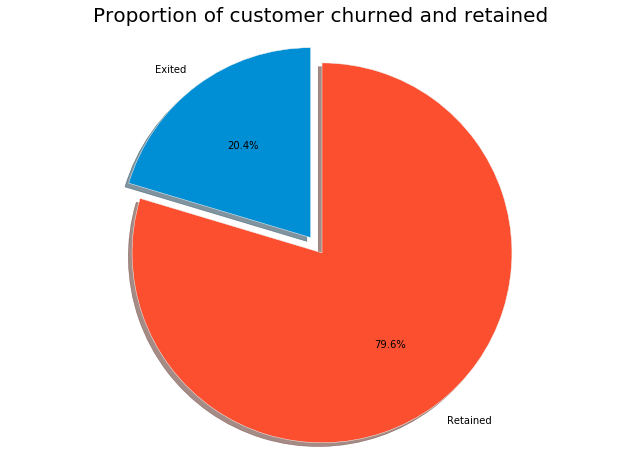

In [9]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

<b> From this chart, one can see that there are many records with the target label  0  and fewer records with the target label  1 . One can see that the data records with a  0  label are about  79.63% , whereas  20.37%  of the data records are labeled  1 . We will use all of these facts in the upcoming sections. For now, we can consider our outcome variable as imbalanced.
    
<b> So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

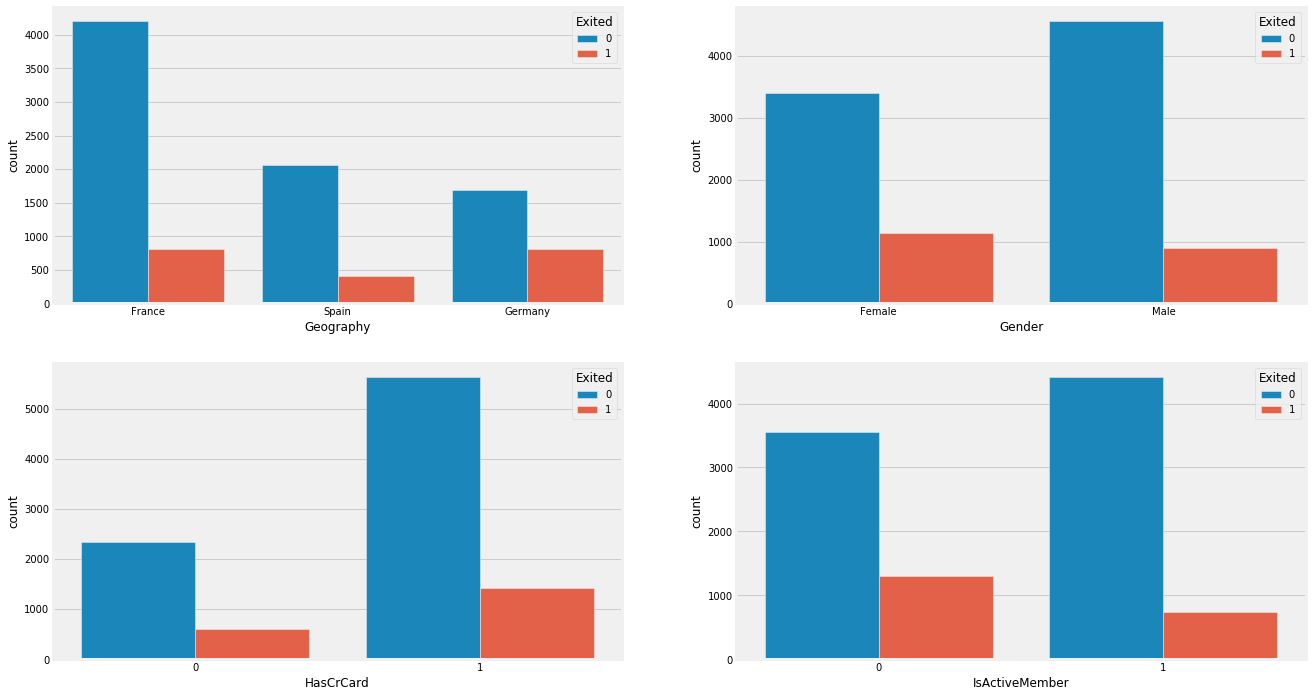

In [10]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<b>We note the following:

       1. Majority of the data is from persons from France. However, the proportion of churned customers is with inversely           related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer           service resources allocated) in the areas where it has fewer clients. The output above shows us that the among the churned customers those who are are geographycally located in Germay have a high rate of churn with  40% , followed by France with  39.8%  and Spain with  20.3% . For non chun customers France is leading with  52.8% , Spain with  25.9%  and Germany with  21.3% .
    
       2. The proportion of female customers churning is also greater than that of male customers.The output above shows us that for the churn customers female have  55.9% , whereas male with  44.1% . For the case of non churn customers  57.3%  are male and  42.7%  are female.
    
       3. Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the               customers have credit cards could prove this to be just a coincidence. The output above shows us that for the churn customers those who possess a card are  69.9% , whereas those don't possess are  30.1% . For the case of non churn customers  70.7%  possess a card and  29.3%  don't possess a card.
    
       4. Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive             mebers is quite high suggesting that the bank may need a program implemented to turn this group to active                   customers as this will definately have a positive impact on the customer churn. The output above shows us that the among the churned customers those who are not active members have a high rate of churn with  63.9% , and active members with  36.1% . For non chun customers active members are leading with  55.5% , and non active members with  44.5% .

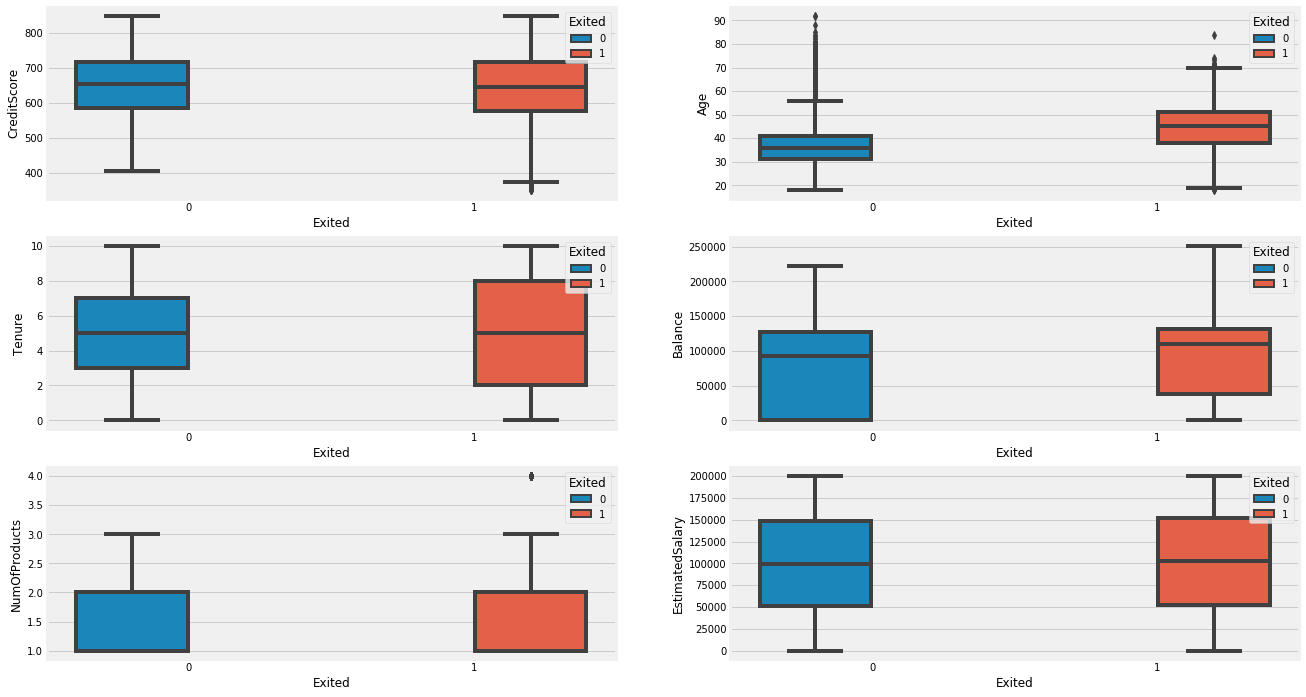

In [11]:
 # Relations based on the continuous data attributes
    
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

<b> We note the following:

1. There is no significant difference in the credit score distribution between retained and churned customers.
2. The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
3. With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
4. Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
5. Neither the product nor the salary has a significant effect on the likelihood to churn.
   

Text(0.5, 1.0, 'creditscore distribution in customer attrition')

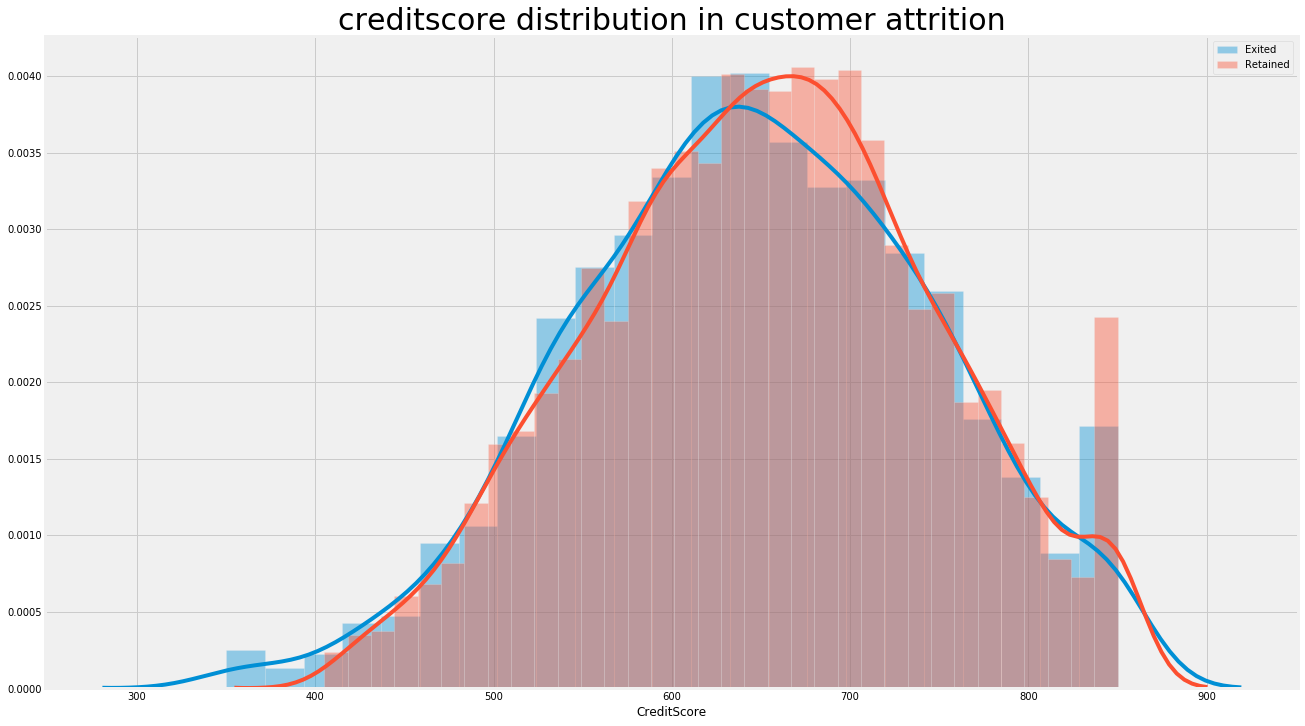

In [12]:
labels = 'Exited', 'Retained'
fig, axarr = plt.subplots( figsize=(20, 12))
sns.distplot(df[df.Exited==1].CreditScore)
sns.distplot(df[df.Exited==0].CreditScore)
plt.legend(labels)
plt.title('creditscore distribution in customer attrition',size=30)

<b> Note:
    Two PDFs are almost overlapping.So its hard to decide attrition based on creditScore

Text(0.5, 1.0, 'Age distribution in customer attrition')

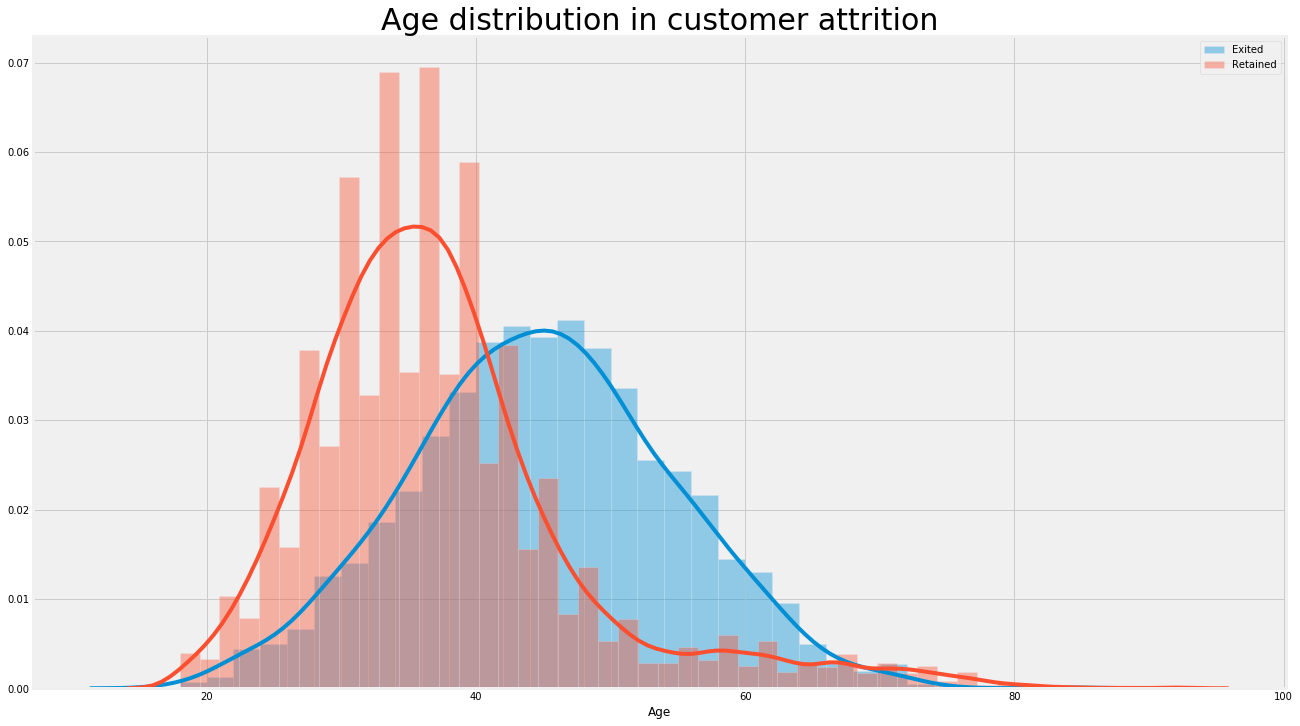

In [13]:
labels = 'Exited', 'Retained'
fig, axarr = plt.subplots( figsize=(20, 12))
sns.distplot(df[df.Exited==1].Age)
sns.distplot(df[df.Exited==0].Age)
plt.legend(labels)
plt.title('Age distribution in customer attrition',size=30)

<b>The graph above shows us that the customers with age of 46 are the most churned.

# 4. Feature Engineering

<b> Gaebage In Garbage Out :
    
    We seek to add features that are likely to have an impact on the probability of churning. We first split the train and test sets

In [14]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1, 5)

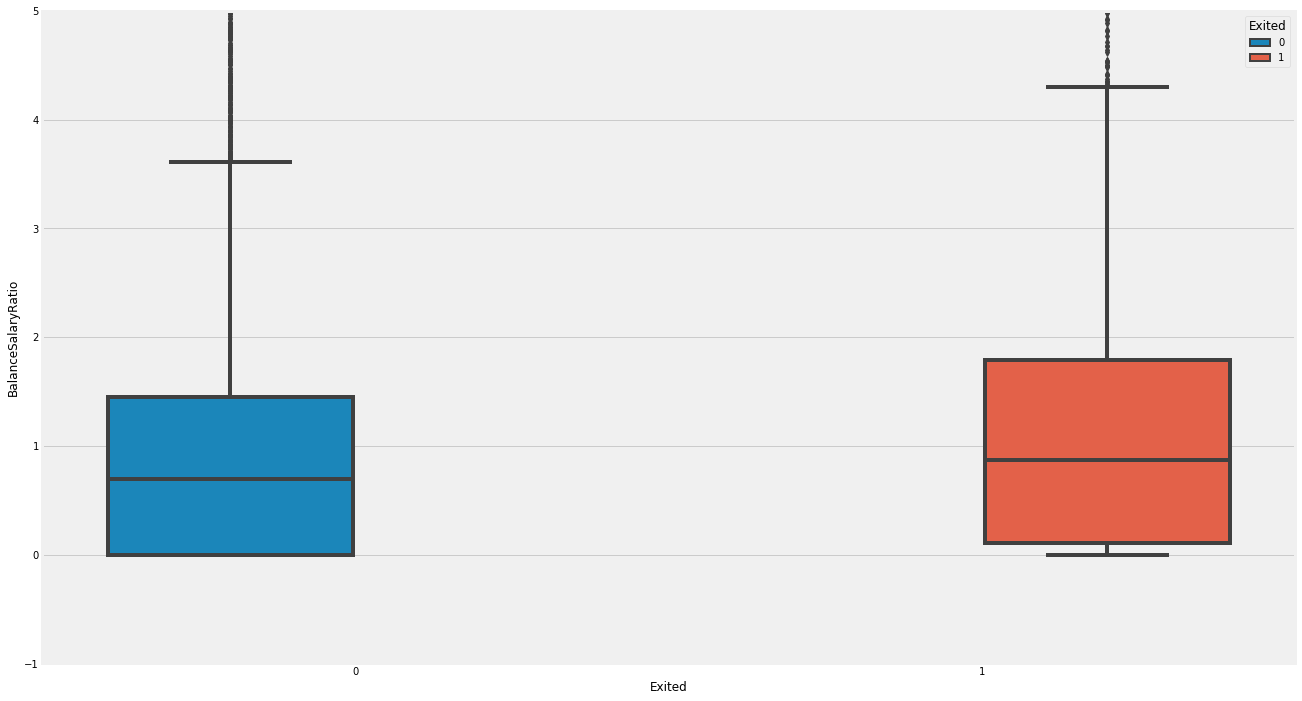

In [15]:
fig, axarr = plt.subplots( figsize=(20, 12))
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1,5)

<b>we have seen that the salary has little effect on the chance of a customer churning. However as seen above, the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their source of loan capital.

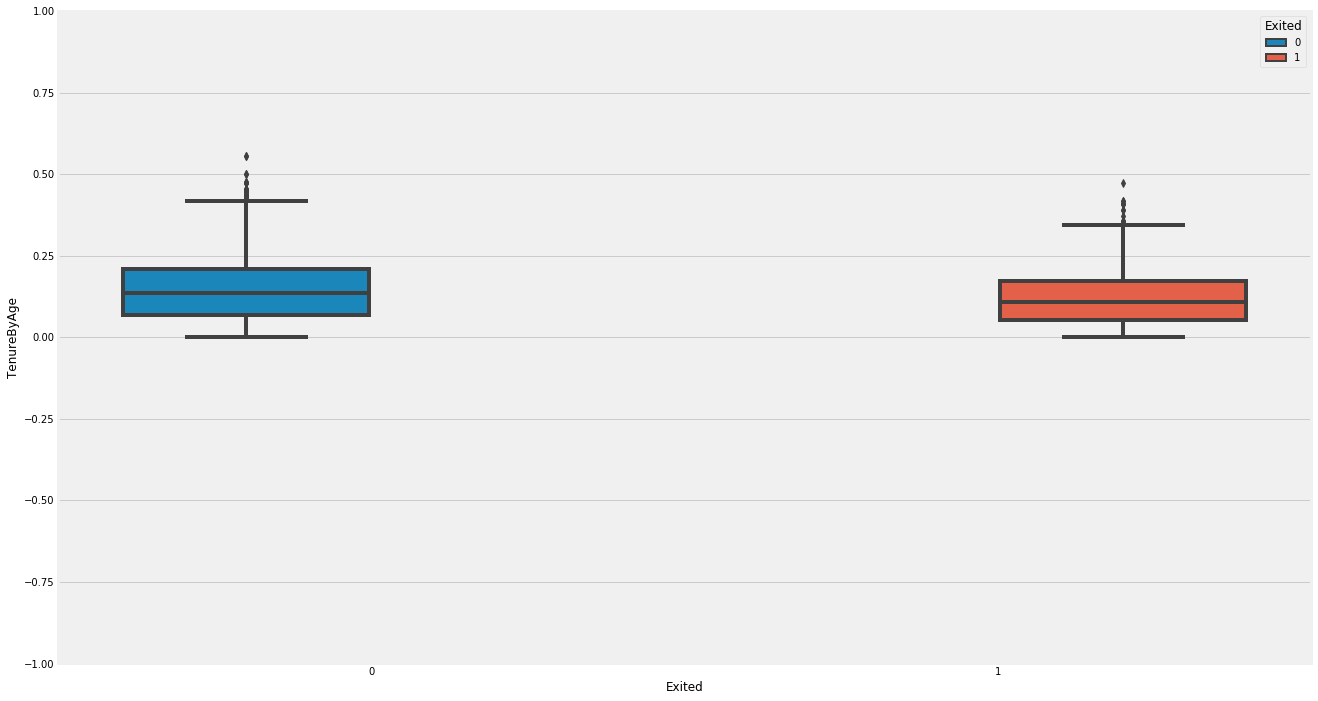

In [16]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
fig, axarr = plt.subplots( figsize=(20, 12))
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)
plt.show()

In [17]:
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

In [18]:
#Result
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


In [19]:
trainig_data = df.copy()

In [20]:
trainig_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
trainig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [21]:
trainig_data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


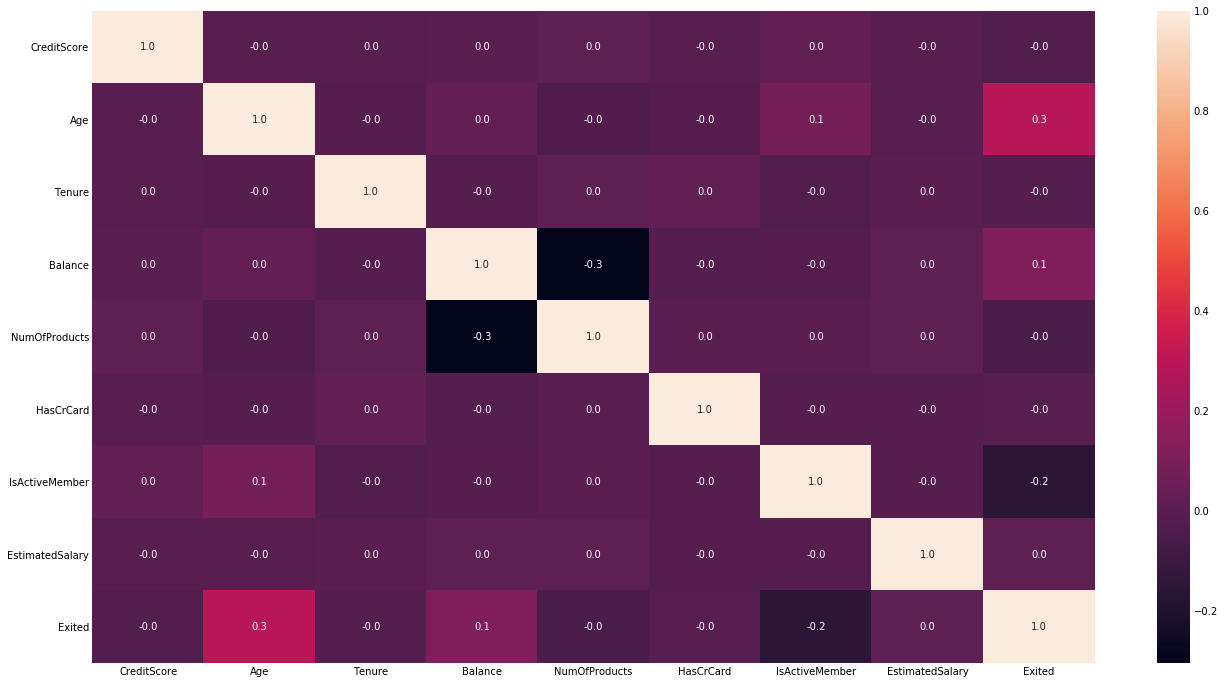

In [22]:
fig, axarr = plt.subplots( figsize=(20, 12))
sns.heatmap(trainig_data.corr(),annot = True,fmt = ".1f")

In [23]:
list_cat = ['Geography', 'Gender']
trainig_data = pd.get_dummies(trainig_data, columns = list_cat, prefix = list_cat)

In [24]:
trainig_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


# Feature Importance

In [25]:
from sklearn.ensemble import RandomForestClassifier

# We perform training on the Random Forest model and generate the importance of the features
X = trainig_data.drop('Exited', axis=1)
y = trainig_data.Exited
features_label = X.columns
forest = RandomForestClassifier (n_estimators = 10000, random_state = 0, n_jobs = -1)
forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) CreditScore                    0.239710
 2) Age                            0.146917
 3) Tenure                         0.144480
 4) Balance                        0.141905
 5) NumOfProducts                  0.128330
 6) HasCrCard                      0.083883
 7) IsActiveMember                 0.039977
 8) EstimatedSalary                0.020773
 9) Geography_France               0.018094
10) Geography_Germany              0.009943
11) Geography_Spain                0.008848
12) Gender_Female                  0.008590
13) Gender_Male                    0.008551


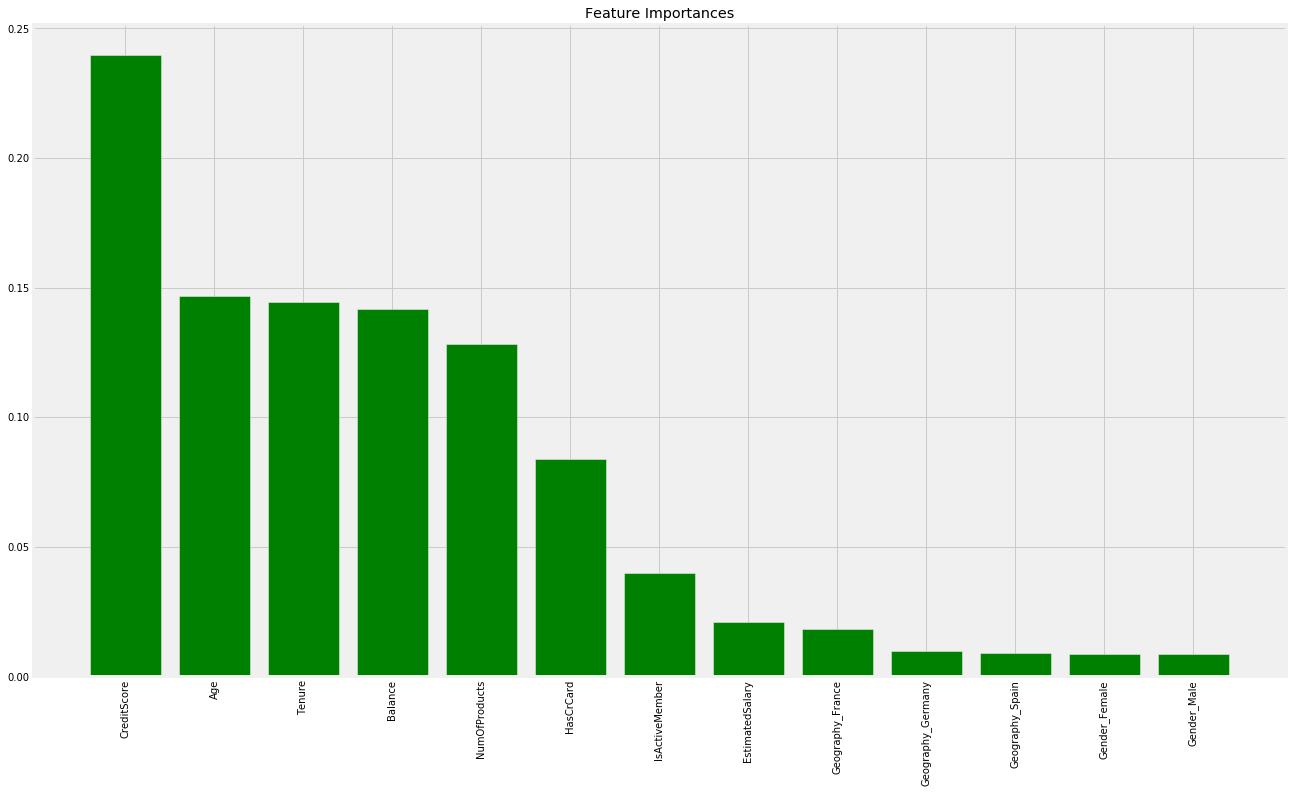

In [26]:
# Visualization of the Feature importances
fig, axarr = plt.subplots( figsize=(20, 12))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color = "green", align = "center")
plt.xticks(range(X.shape[1]), features_label, rotation = 90)
plt.show()

In [27]:
# Import different models 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Scoring function
from sklearn.metrics import roc_auc_score, roc_curve

In [28]:
X = trainig_data.drop('Exited', axis=1)
y = trainig_data.Exited

In [29]:
# Splitting the dataset in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [30]:
# Initialization of the Random Forest model
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini')
# Fitting the model with training data 
rfMod.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
# Compute the model accuracy on the given test data and labels
rf_acc = rfMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = rfMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
rf_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')

In [32]:
rf_roc_auc

0.8221739443380551

In [33]:
rf_acc

0.8512

In [34]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, rfMod.predict_proba(np.array(X_test.values))[:,1])

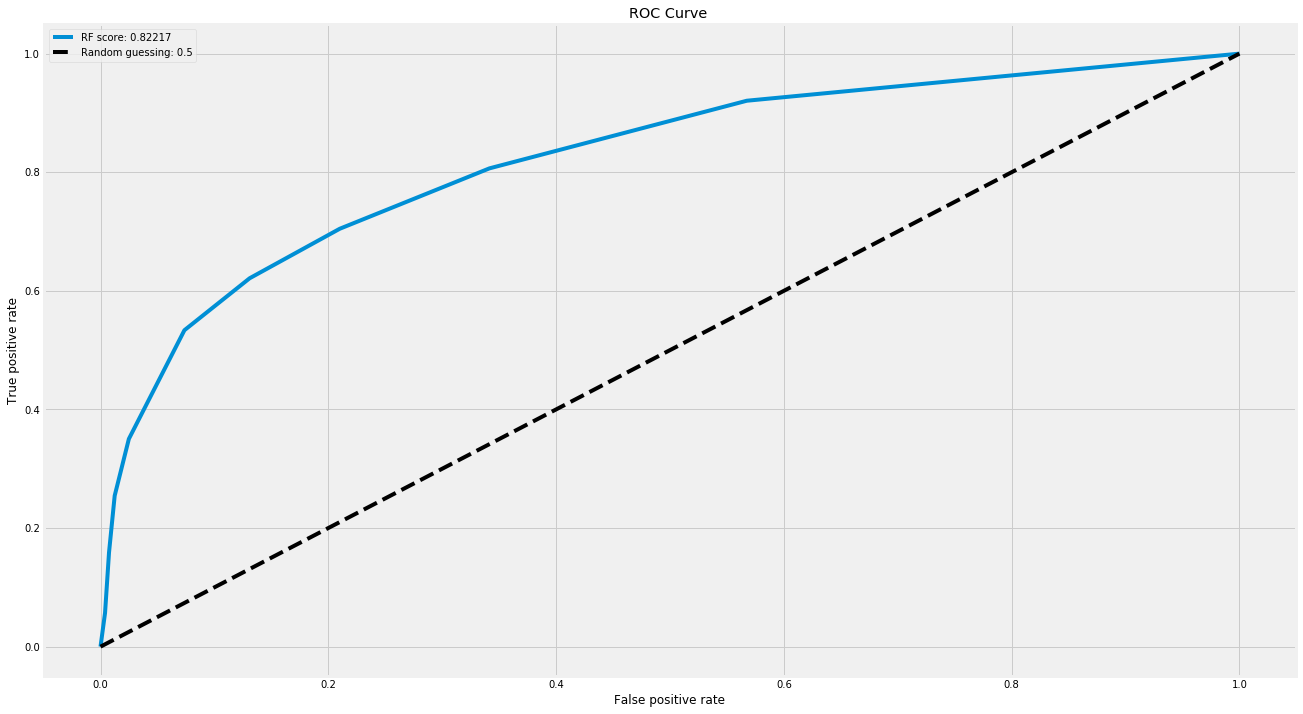

In [35]:
fig, axarr = plt.subplots( figsize=(20, 12))
plt.plot(fpr_rf, tpr_rf, label = 'RF score: ' + str(round(rf_roc_auc, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve ')
plt.legend(loc='best')
plt.show()

In [36]:
import pickle

In [37]:
with open('bank.pkl', 'wb') as f:
    pickle.dump(rfMod, f)

In [40]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
4117,561,37,5,0.00,2,1,0,83093.25,1,0,0,0,1
161,684,30,2,0.00,2,1,0,83473.82,1,0,0,0,1
2843,666,38,6,99812.88,2,1,1,158357.97,0,1,0,0,1
9618,581,24,3,95508.20,1,1,1,45755.00,1,0,0,1,0
810,618,35,10,0.00,2,1,0,180439.75,1,0,0,1,0


In [41]:
X_test.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 4117 to 998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2500 non-null   int64  
 1   Age                2500 non-null   int64  
 2   Tenure             2500 non-null   int64  
 3   Balance            2500 non-null   float64
 4   NumOfProducts      2500 non-null   int64  
 5   HasCrCard          2500 non-null   int64  
 6   IsActiveMember     2500 non-null   int64  
 7   EstimatedSalary    2500 non-null   float64
 8   Geography_France   2500 non-null   uint8  
 9   Geography_Germany  2500 non-null   uint8  
 10  Geography_Spain    2500 non-null   uint8  
 11  Gender_Female      2500 non-null   uint8  
 12  Gender_Male        2500 non-null   uint8  
dtypes: float64(2), int64(6), uint8(5)
memory usage: 188.0 KB


In [54]:
ans = rfMod.predict([[522,25,5,5555,2,1,1,2356,1,0,0,0,1]])

In [46]:
str = '100'
np.float(str)

100.0

In [61]:
int(ans[0])

0

In [62]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2478,774,41,5,126670.37,1,1,0,102426.06,1,0,0,1,0
5847,517,45,4,0.00,1,0,0,172674.36,1,0,0,1,0
2640,625,31,8,0.00,2,1,0,151843.54,0,0,1,1,0
451,850,40,9,0.00,2,0,1,119232.33,1,0,0,0,1
1876,640,39,9,131607.28,4,0,1,6981.43,0,1,0,0,1


In [63]:
y_train

2478    0
5847    1
2640    0
451     0
1876    1
5137    1
4998    0
6942    0
3315    0
1932    0
5495    0
5152    0
8919    0
5473    0
6542    0
223     1
163     0
7514    1
2230    0
5395    0
6594    1
4713    0
9427    0
3065    0
4760    0
9767    0
8913    0
5527    0
3769    0
5487    0
6450    0
6506    1
6982    0
3710    0
890     0
5972    1
8469    0
6614    0
2961    0
7593    0
6518    1
4700    0
7815    0
3085    1
9844    0
4026    1
6285    0
1280    0
856     1
270     0
9730    0
3422    0
6969    0
581     1
1333    0
1175    0
7004    0
614     0
8952    1
3470    0
5063    0
7215    0
7158    1
1762    0
6745    0
2923    0
2040    0
6653    0
6548    0
1014    0
4017    1
7533    1
78      0
1520    1
4778    0
1096    1
8790    0
5311    0
1588    0
6977    0
5589    1
7898    0
6937    0
1944    0
6549    0
5536    0
8499    0
117     0
8501    0
7418    0
3927    0
6382    0
3371    1
9787    0
840     1
2908    0
820     0
9728    1
5670    0
8661    0
